In [ ]:
from google.colab import files
files.upload()  # Select kaggle.json when prompted

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"mathivarunir","key":"39c6cb53a4ec0120e64b3509b73f13d7"}'}

In [ ]:
!kaggle datasets download -d karimabdulnabi/fruit-classification10-class --unzip -p /content/


Dataset URL: https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class
License(s): CC0-1.0
fruit-classification10-class.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os
print(os.listdir("/content/"))  # Check what was extracted


['.config', 'C:\\Users\\A\\Documents\\2024231028-SE\\datasets', 'MY_data', 'fruit-classification10-class.zip', 'kaggle (2).json', 'C:\\Users\\A\\Documents\\2024231028-SE\\datasets\\fruit_dataset', 'fruit_dataset', 'sample_data']


In [ ]:
import zipfile

zip_path = "/content/fruit-classification10-class.zip"
extract_path = "/content/fruit-classification10-class"

# Extract only if the directory does not already exist
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Dataset extracted successfully.")
else:
    print("⚠️ Dataset already extracted.")


✅ Dataset extracted successfully.


In [ ]:
print(os.listdir("/content/fruit-classification10-class"))


['MY_data']


In [ ]:
dataset_path = "/content/fruit-classification10-class/MY_data"

train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

# Verify if the train and test directories exist
if os.path.exists(train_dir) and os.path.exists(test_dir):
    print("✅ Dataset is ready.")
else:
    print("❌ Dataset structure is incorrect. Check extracted files:")
    print(os.listdir(dataset_path))  # Debugging


✅ Dataset is ready.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
dataset_path = "/content/fruit-classification10-class/MY_data"

train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

# Define image parameters
IMG_SIZE = (150, 150)
BATCH_SIZE = 32


In [ ]:
#Load and Preprocess Data
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,     # Normalize pixel values
    rotation_range=30,   # Rotate images
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Only rescale for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Since it's multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Get class labels
class_labels = list(train_generator.class_indices.keys())
print("Class Labels:", class_labels)


Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.
Class Labels: ['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']


In [ ]:
#define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Helps prevent overfitting
    layers.Dense(len(class_labels), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train model
EPOCHS = 10  # Adjust based on performance

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.1659 - loss: 2.3697 - val_accuracy: 0.3122 - val_loss: 1.8078
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 31s 197ms/step - accuracy: 0.3150 - loss: 1.7329 - val_accuracy: 0.3337 - val_loss: 1.6806
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - accuracy: 0.3851 - loss: 1.5906 - val_accuracy: 0.4020 - val_loss: 1.6620
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.4500 - loss: 1.4333 - val_accuracy: 0.3795 - val_loss: 1.7575
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - accuracy: 0.5186 - loss: 1.3305 - val_accuracy: 0.4098 - val_loss: 1.6700
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 0.5342 - loss: 1.2845 - val_accuracy: 0.4888 - val_loss: 1.5125
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - accuracy: 0.5574 - loss: 1.1931 - val_accuracy: 0.4956 - val_loss: 1.6030
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.5907 - loss: 1.1255 - val_accu

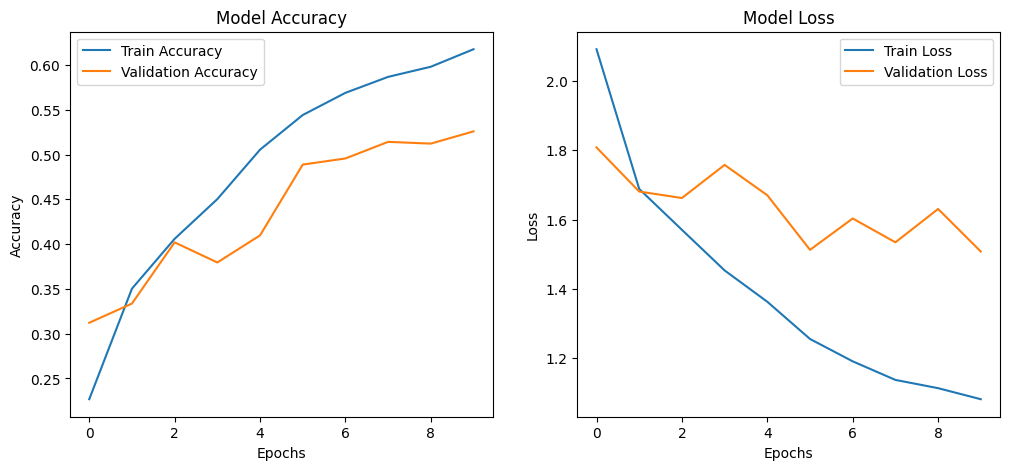

In [ ]:
#EVALUATE MODEL
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.show()


In [ ]:
#save model
model.save('fruit_classifier_model.keras')
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
import os

print("Available Classes:", os.listdir(test_dir))  # List all classes in test directory


Available Classes: ['mango', 'apple', 'cherry', 'banana', 'pinenapple', 'avocado', 'orange', 'watermelon', 'kiwi', 'stawberries']


In [ ]:
apple_class_path = os.path.join(test_dir, "apple")  # Change if "apple" isn't found
if os.path.exists(apple_class_path):
    print("Images in 'apple' folder:", os.listdir(apple_class_path))
else:
    print("❌ The 'apple' folder does not exist! Check the correct class name.")


Images in 'apple' folder: ['img_1051.jpeg', 'img_1061.jpeg', 'img_891.jpeg', 'img_801.jpeg', 'img_1101.jpeg', 'img_281.jpeg', 'img_1171.jpeg', 'img_961.jpeg', 'img_711.jpeg', 'img_731.jpeg', 'img_681.jpeg', 'img_861.jpeg', 'img_221.jpeg', 'img_561.jpeg', 'img_141.jpeg', 'img_371.jpeg', 'img_1031.jpeg', 'img_721.jpeg', 'img_631.jpeg', 'img_811.jpeg', 'img_791.jpeg', 'img_161.jpeg', 'img_351.jpeg', 'img_1011.jpeg', 'img_1181.jpeg', 'img_401.jpeg', 'img_1191.jpeg', 'img_1201.jpeg', 'img_441.jpeg', 'img_491.jpeg', 'img_131.jpeg', 'img_771.jpeg', 'img_751.jpeg', 'img_971.jpeg', 'img_671.jpeg', 'img_591.jpeg', 'img_421.jpeg', 'img_621.jpeg', 'img_381.jpeg', 'img_521.jpeg', 'img_301.jpeg', 'img_991.jpeg', 'img_911.jpeg', 'img_831.jpeg', 'img_311.jpeg', 'img_1001.jpeg', 'img_1161.jpeg', 'img_851.jpeg', 'img_661.jpeg', 'img_821.jpeg', 'img_921.jpeg', 'img_461.jpeg', 'img_291.jpeg', 'img_781.jpeg', 'img_251.jpeg', 'img_271.jpeg', 'img_511.jpeg', 'img_571.jpeg', 'img_151.jpeg', 'img_691.jpeg', 'i

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


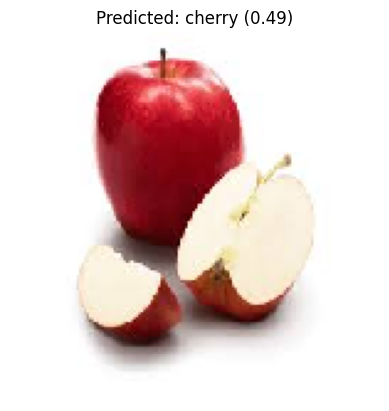

In [ ]:
sample_image = os.path.join(test_dir, "apple", "img_1051.jpeg")  # Replace with an actual filename
predict_image(sample_image, model)


In [ ]:
import os

apple_class_path = os.path.join(test_dir, "apple")  # Update folder name if needed

# Ensure the directory exists
if not os.path.exists(apple_class_path):
    print("❌ The 'apple' folder does not exist! Check the correct class name.")
else:
    # Loop through all image files in the folder
    for image_name in os.listdir(apple_class_path):
        image_path = os.path.join(apple_class_path, image_name)

        # Ensure it's a valid image file (optional check)
        if image_name.endswith((".jpg", ".jpeg", ".png")):
            print(f"🔍 Predicting: {image_name}")
            predict_image(image_path, model)  # Call your prediction function
        else:
            print(f"⚠️ Skipping non-image file: {image_name}")


In [ ]:
fruit_classes = ['mango', 'apple', 'cherry', 'banana', 'pinenapple', 'avocado', 'orange', 'watermelon', 'kiwi', 'stawberries']

for fruit in fruit_classes:
    fruit_path = os.path.join(test_dir, fruit)  # Get class folder path

    # Ensure directory exists
    if not os.path.exists(fruit_path):
        print(f"⚠️ Skipping {fruit}: Folder not found!")
        continue

    print(f"\n🔹 Predicting images in '{fruit}' folder:")

    # Loop through all images in the folder
    for image_name in os.listdir(fruit_path):
        image_path = os.path.join(fruit_path, image_name)

        # Ensure it's a valid image file
        if image_name.endswith((".jpg", ".jpeg", ".png")):
            print(f"🔍 Predicting: {image_name}")
            predict_image(image_path, model)
        else:
            print(f"⚠️ Skipping non-image file: {image_name}")
